<a href="https://colab.research.google.com/github/joannawqy/ECON323/blob/main/FinalProject_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('merged_data.csv')
df.head()
df.columns

Index(['country', 'Code', 'ContinentCode', 'year',
       'GDP per capita constant 2010 dollars',
       'Capital investment as percent of GDP',
       'Capital investment billion USD',
       'Household consumption as percent of GDP',
       'Household consumption billion USD', 'Labor force million people',
       'Government spending as percent of GDP',
       'Government spending billion USD', 'Population growth percent',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Economic growth: the rate of change of real GDP',
       'Gross Domestic Product billions of 2010 U.S. dollars',
       'Unemployment rate', 'Exports of goods and services billion USD',
       'Exports of goods and services annual growth',
       'Current account balance billion USD', 'ranking index'],
      dtype='object')

In [3]:
df.columns

Index(['country', 'Code', 'ContinentCode', 'year',
       'GDP per capita constant 2010 dollars',
       'Capital investment as percent of GDP',
       'Capital investment billion USD',
       'Household consumption as percent of GDP',
       'Household consumption billion USD', 'Labor force million people',
       'Government spending as percent of GDP',
       'Government spending billion USD', 'Population growth percent',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Economic growth: the rate of change of real GDP',
       'Gross Domestic Product billions of 2010 U.S. dollars',
       'Unemployment rate', 'Exports of goods and services billion USD',
       'Exports of goods and services annual growth',
       'Current account balance billion USD', 'ranking index'],
      dtype='object')

In [4]:
X = df.drop(['country', 'Code', 'ContinentCode', 'year', 'ranking index'], axis=1)
y = df['ranking index']

In [5]:
X.head()

,GDP per capita constant 2010 dollars,Capital investment as percent of GDP,Capital investment billion USD,Household consumption as percent of GDP,Household consumption billion USD,Labor force million people,Government spending as percent of GDP,Government spending billion USD,Population growth percent,Happiness Index 0 (unhappy) - 10 (happy),Economic growth: the rate of change of real GDP,Gross Domestic Product billions of 2010 U.S. dollars,Unemployment rate,Exports of goods and services billion USD,Exports of goods and services annual growth,Current account balance billion USD
0,13595.04,18.21,117.22,66.74,429.55,19.58,17.70,113.90,1.04,6.60,2.82,598.8,8.35,72.86,2.62,-31.15
1,13105.40,16.61,87.19,69.47,364.59,20.10,15.81,82.95,1.02,6.39,-2.62,583.1,9.22,75.77,0.65,-27.08
2,12716.22,14.21,63.63,66.13,296.09,20.61,16.44,73.63,0.99,6.09,-2.00,571.5,9.84,80.26,9.75,-3.49
3,11341.27,14.13,54.48,63.79,245.94,19.41,16.89,65.12,0.97,5.93,-9.94,514.6,11.46,64.04,-17.71,3.12
4,12402.49,17.47,85.14,60.89,296.69,21.19,15.84,77.19,0.95,5.97,10.40,568.1,8.74,87.87,9.22,6.71


In [6]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [8]:
X_train

array([[ 0.92161098, -0.20788417, -0.23247013, ..., -0.44927115,
         0.17740656, -0.05298222],
       [-0.2621569 , -0.47628473, -0.14396548, ...,  0.18968938,
         0.95457619, -0.28142802],
       [ 2.73120052,  0.75835785, -0.36699908, ...,  0.15536294,
         1.7430296 ,  0.235288  ],
       ...,
       [-1.34516158, -0.99230646, -0.32635343, ..., -0.30233342,
        -1.40232118,  0.06256238],
       [-1.23514234,  3.26920182,  3.4451232 , ...,  4.80707906,
        -0.36632195,  2.69949749],
       [ 0.71894027,  0.21982511, -0.35815488, ..., -0.51387832,
         1.04484635,  0.19306309]])

In [9]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5)

These features are assigned with 0 coefficient: Index(['Household consumption billion USD', 'Government spending billion USD'], dtype='object')


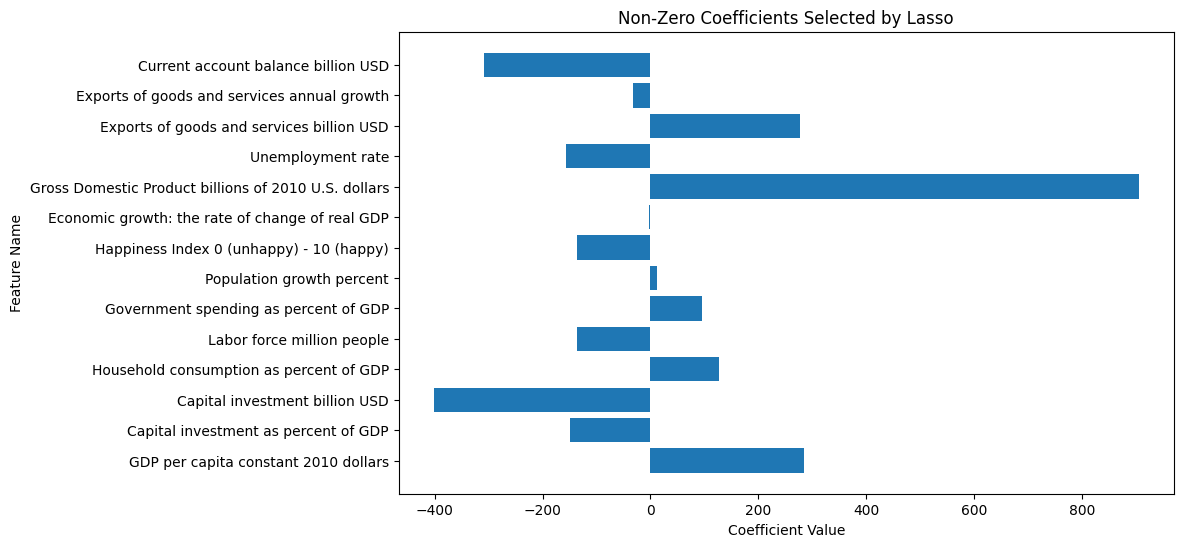

In [19]:
coefs = lasso_cv.coef_
features = X.columns

# Filter out the non-zero coefficients and their corresponding feature names
selected_features = features[coefs != 0]
selected_coefs = coefs[coefs != 0]
unselected_features = features[coefs == 0]
print(f"These features are assigned with 0 coefficient: {unselected_features}")

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(selected_features, selected_coefs)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Non-Zero Coefficients Selected by Lasso')
plt.show()

In [11]:
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 245408.8666675448


In [12]:
print(f"Best alpha: {lasso_cv.alpha_}")
coef_dict = {df.columns[i+4]: lasso_cv.coef_[i] for i in range(len(df.columns)-5)}
print(coef_dict)

Best alpha: 2.9184026880155245
{'GDP per capita constant 2010 dollars': 284.59279880949015, 'Capital investment as percent of GDP': -148.3153196376731, 'Capital investment billion USD': -401.28337167750595, 'Household consumption as percent of GDP': 126.36469701416918, 'Household consumption billion USD': 0.0, 'Labor force million people': -136.62878284702046, 'Government spending as percent of GDP': 94.63311579972009, 'Government spending billion USD': -0.0, 'Population growth percent': 11.489308264770605, 'Happiness Index 0 (unhappy) - 10 (happy)': -136.58378948582026, 'Economic growth: the rate of change of real GDP': -2.940734812639101, 'Gross Domestic Product billions of 2010 U.S. dollars': 904.656811519385, 'Unemployment rate': -156.57509211483753, 'Exports of goods and services billion USD': 278.0256817477885, 'Exports of goods and services annual growth': -32.728528846727905, 'Current account balance billion USD': -308.20287848085246}


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


In [15]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_scaled, y)

RandomForestRegressor()

In [16]:
importances = rf.feature_importances_

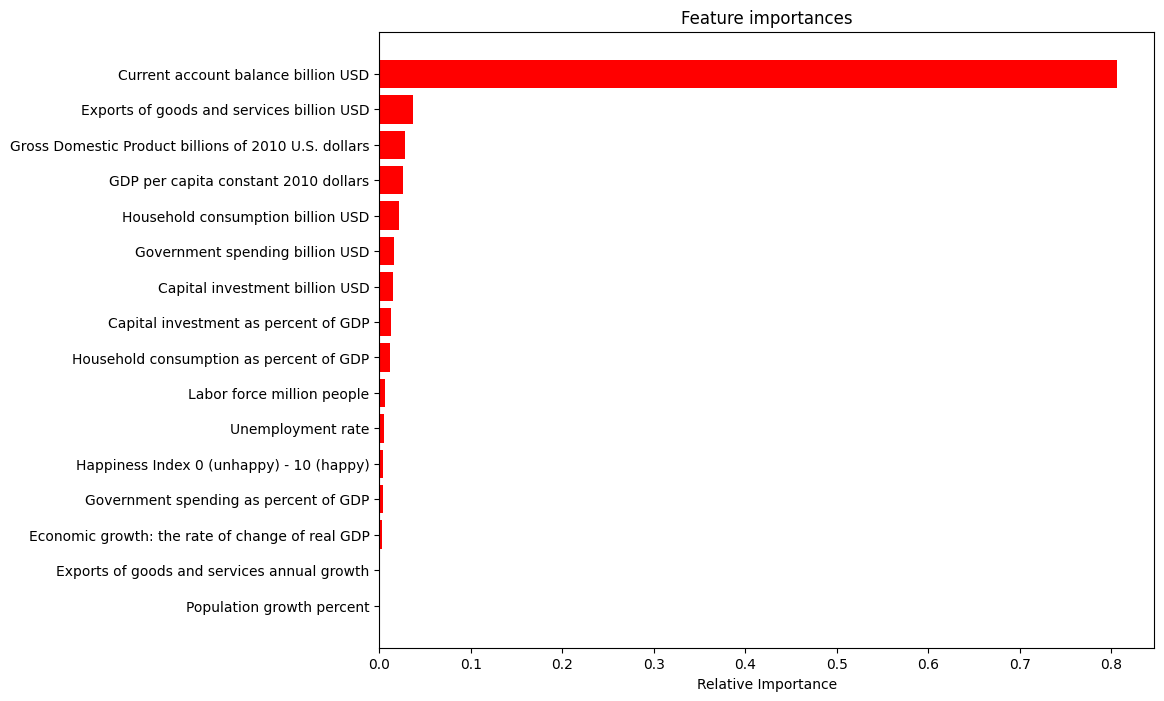

In [18]:
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="r", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Method Selection

We choose to proceed with Lasso because:

*   Model Assumptions: LASSO assumes a linear relationship between features and the target variable
*   Overfitting: LASSO, with its regularization, inherently prevents overfitting. If your dataset is small or noisy, LASSO's feature selection might generalize better.
*   Interpretability: LASSO provides a more straightforward explanation by selecting a smaller subset of features with linear coefficients.
*   Model Purpose: Because the purpose of the model is for inference, understanding which features are important and their relationship with the target, LASSO is more preferable over random forest.



